# PRINCIPAL COMPONENT ANALYSIS

## Principal Component Analysis - Introduction :

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

## What Are Principal Components?

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.



## Loading The Dataset

In [1]:
import pandas as pd
df=pd.read_csv('iris_dataset.csv')
df.rename(columns={"SepalLengthCm":"Sepal_Len","SepalWidthCm":"Sepal_Width","PetalLengthCm":"Petal_Len","PetalWidthCm":"Petal_Width"},inplace=True)
df.head()


,Id,Sepal_Len,Sepal_Width,Petal_Len,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Splitting The Data Table into data X and class Labels Y
X=df.iloc[:,1:5]
Y=df.iloc[:,5]
X

,Sepal_Len,Sepal_Width,Petal_Len,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Exploratory Visualisation

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

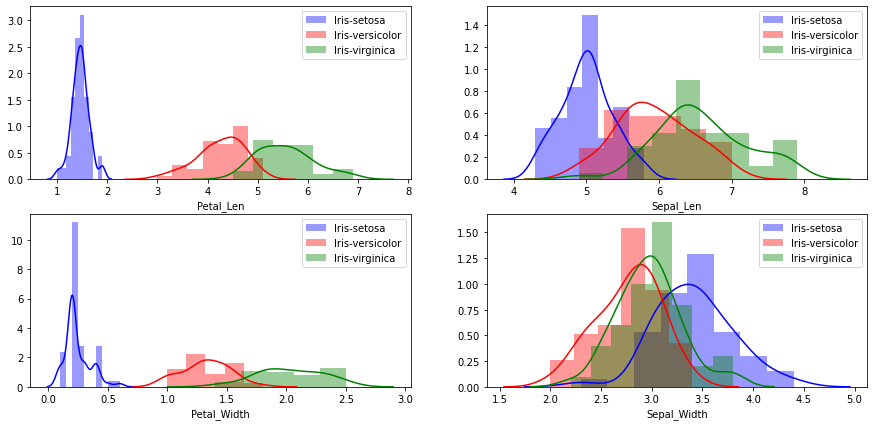

In [4]:
# Distribution of the features of the flowers
fig,axes=plt.subplots(2,2,figsize=(15,7))
plt.subplot(2,2,1)
a=sns.distplot(df[df.Species=='Iris-setosa']['Petal_Len'],color='blue',label='Iris-setosa')
a=sns.distplot(df[df.Species=='Iris-versicolor']['Petal_Len'],color='red',label='Iris-versicolor')
a=sns.distplot(df[df.Species=='Iris-virginica']['Petal_Len'],color='green',label='Iris-virginica')
plt.legend()
plt.subplot(2,2,2)
a=sns.distplot(df[df.Species=='Iris-setosa']['Sepal_Len'],color='blue',label='Iris-setosa')
a=sns.distplot(df[df.Species=='Iris-versicolor']['Sepal_Len'],color='red',label='Iris-versicolor')
a=sns.distplot(df[df.Species=='Iris-virginica']['Sepal_Len'],color='green',label='Iris-virginica')
plt.legend()
plt.subplot(2,2,3)
a=sns.distplot(df[df.Species=='Iris-setosa']['Petal_Width'],color='blue',label='Iris-setosa')
a=sns.distplot(df[df.Species=='Iris-versicolor']['Petal_Width'],color='red',label='Iris-versicolor')
a=sns.distplot(df[df.Species=='Iris-virginica']['Petal_Width'],color='green',label='Iris-virginica')
plt.legend()
plt.subplot(2,2,4)
a=sns.distplot(df[df.Species=='Iris-setosa']['Sepal_Width'],color='blue',label='Iris-setosa')
a=sns.distplot(df[df.Species=='Iris-versicolor']['Sepal_Width'],color='red',label='Iris-versicolor')
a=sns.distplot(df[df.Species=='Iris-virginica']['Sepal_Width'],color='green',label='Iris-virginica')
plt.legend()
plt.show()

## Standardising the data

$ X_{std} = \frac{X-\mu}{\sigma} $

where 

$ \mu =  mean $

$ \sigma = standard \ deviation $

In [5]:
import numpy as np
X_std=(X-np.mean(X,axis=0))/np.std(X,axis=0)
X_std

,Sepal_Len,Sepal_Width,Petal_Len,Petal_Width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


## Covariance Matrix

The covariance between two features is calculated as:

$ \sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right). $

We can summarize the calculation of the covariance matrix via the following matrix equation:

$ \Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right) $

where $ \bar{x} \ \ is \ the \ mean \ vector \ \mathbf{\bar{x}} = \sum\limits_{k=1}^n x_{k} $



In [6]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=((X_std-mean_vec).T).dot((X_std-mean_vec))/(X_std.shape[0]-1)
cov_mat


,Sepal_Len,Sepal_Width,Petal_Len,Petal_Width
Sepal_Len,1.006711,-0.110103,0.877605,0.823443
Sepal_Width,-0.110103,1.006711,-0.423338,-0.358937
Petal_Len,0.877605,-0.423338,1.006711,0.969219
Petal_Width,0.823443,-0.358937,0.969219,1.006711


## Eigen Decomposition on the covariance matrix

In [7]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat)
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

## Selecting Principal Components

The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1

In order to decide which eigenvector(s) can be dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigenvectors.

In [8]:
# Making a list of (eigen value,eigen vector) tuples

eig_pairs=[[np.abs(eig_vals[i]),eig_vecs[:,i]] for i in range(len(eig_vals))]

eig_pairs.sort()
eig_pairs.reverse()

for i in eig_pairs:
    print(i[0]) 
# If the largest element in absolute value in the eigen vectors is positive then dont do anything , else change all the values in thae vector to its opposite sign
for i in eig_pairs:
    if -1*min(i[1])>max(i[1]):
        i[1]=-1*i[1]

2.9303537755893165
0.927403621517342
0.14834222648164003
0.02074601399559599


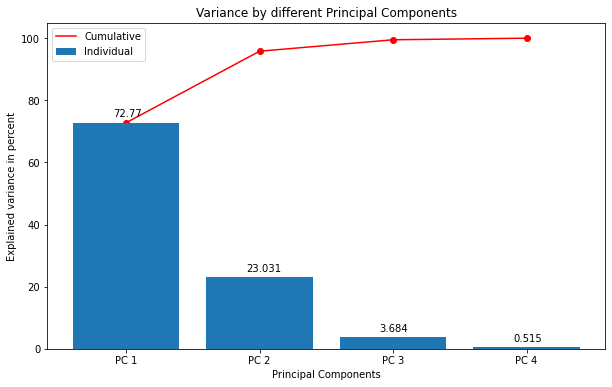

In [9]:
# Information(variance) attributed to each principal component

total=sum(eig_vals)
var=[(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var=np.cumsum(var)

x=['PC %s' %i for i in range(1,5)]
fig,ax=plt.subplots(1,1,figsize=(10,6))
plt.subplot(1,1,1)
plt.bar(x,var,label='Individual')
plt.scatter(x,cum_var,color='red')
plt.plot(x,cum_var,color='red',label='Cumulative')
plt.xlabel('Principal Components')
plt.ylabel('Explained variance in percent')
plt.title('Variance by different Principal Components')
for index,value in enumerate(x):
    plt.text(index-0.1,var[index]+2,str(round(var[index],3)))
plt.legend()

The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

Here we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace , by choosing the top 2 eigen vectors with the highest eigen values to construct a 4x2 dimensional eigen vector matrix

In [10]:
matrix_w=np.hstack((eig_pairs[0][1].reshape(4,1),eig_pairs[1][1].reshape(4,1)))
matrix_w

array([[ 0.52237162,  0.37231836],
       [-0.26335492,  0.92555649],
       [ 0.58125401,  0.02109478],
       [ 0.56561105,  0.06541577]])

## Projection On The New Feature Subspace

We will use the projection matrix W to transform our samples into the new feature subspace using the equation:

$ Y = X \times W $

where $ Y \ is \ a \ 150 \times 2 \ matrix $ of the transformed sample

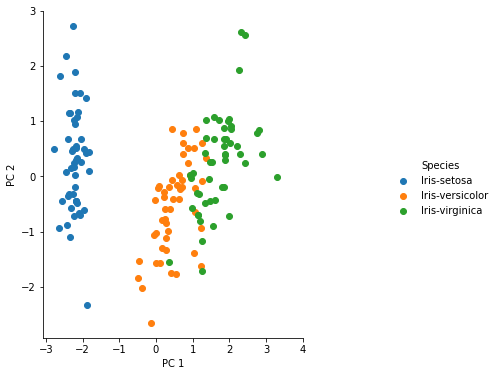

In [11]:
Y=X_std.dot(matrix_w)

# concatenating the 150x2 dataframe with the corresponding flower species
finalDf=pd.concat([Y,df[['Species']]],axis=1)
finalDf.rename(columns={0:'PC 1',1:'PC 2'},inplace=True)

ax=sns.FacetGrid(finalDf,hue='Species').map(plt.scatter,'PC 1','PC 2').add_legend()
plt.xlim(None,4)
plt.ylim(None,3)
ax.fig.set_figwidth(8)
ax.fig.set_figheight(6)

## PCA in Scikit-learn

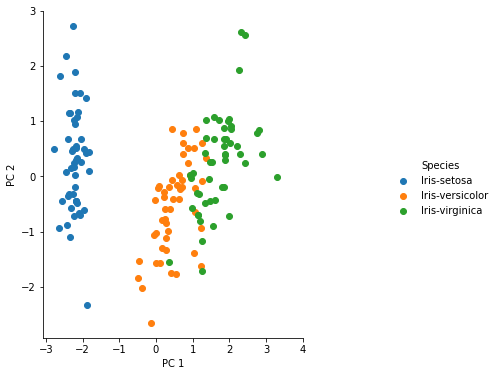

In [12]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca=sklearnPCA(n_components=2)
Y_sklearn=sklearn_pca.fit_transform(X_std)
dataframe=pd.DataFrame(data=Y_sklearn,columns=['PC 1','PC 2'])
finalDf1=pd.concat([dataframe,df[['Species']]],axis=1)
finalDf1
ax=sns.FacetGrid(finalDf1,hue='Species').map(plt.scatter,'PC 1','PC 2').add_legend()
plt.xlim(None,4)
plt.ylim(None,3)
ax.fig.set_figwidth(8)
ax.fig.set_figheight(6)